# Introducción al Machine Learning - Semana 2
## Taller: Implementación de Ridge, LASSO y Elastic Net
### Propósito de la actividad
En esta actividad podrá poner en práctica, con un conjunto de datos simulados, la implementación de modelos lineales regularizados. En particular, se implementarán tres modelos: regresión con penalización tipo Ridge, regresión con penalización tipo LASSO y regresión con penalización tipo Elastic Net.

### Instrucciones generales

1. Esta actividad es para que la desarrolle individualmente. Para hacerlo, deberá descargar este notebook eligiendo la opción ‘Download as’ del menú ‘File’ y descargar el archivo en formato notebook (.ipynb).

2. Para que la actividad sea calificada, deberán subir únicamente el archivo del notebook en el que trabajó a la actividad de "entrega calificada por el personal" correspondiente a este taller y que encuentra en la plataforma después de esta actividad. El archivo deberá subirlo en el mismo formato en el que lo descargó (con la extensión ".ipynb").


### Criterios de evaluación

Los criterios que se evaluarán son:   

Elección del tipo de penalización: Se utiliza adecuadamente el parámetro “penalizacion” de acuerdo a como fue especificado en el enunciado. [10 puntos]

Funcionamiento del código: El código permite estimar correctamente los tres modelos, utilizando la muestra de entrenamiento. [60 puntos]

Medición del desempeño: El código permite que el modelo que se seleccione calcule el MSE en la muestra de evaluación. [30 puntos]


### Penalización en modelos lineales

Adicional a la selección de variables en un modelo y a la transformación de variables usando PCA o PLS, los modelos lineales con penalización son una tercera alternativa para calibrar mejor y más fácil los modelos de regresión lineal.

Recordemos que inicialmente tenemos el modelo de mínimos cuadrados como punto de partida. Así, este modelo se estima resolviendo el siguiente problema de optimización:

$$\hat\beta = argmin \sum_{i=1}^{n} (Y_i-\beta^tX_i)^2$$

Sin embargo, es posible que la redundancia de información entre las variables predictoras genere que la estimación de los betas tenga mucha varianza y, por lo tanto, algunos betas tomen valores absolutos muy grandes.

Por tal motivo, los modelos que se van a presentar en este notebook penalizan el tamaño del vector de betas para evitar el anterior inconveniente, tal y como se presenta en el siguiente problema de optimización:

$$\hat\beta = argmin \sum_{i=1}^{n} (Yi-\beta^tX_i)^2 + \lambda ||\beta|| $$

Donde $\lambda>0$ es el parámetro de penalización y $||\beta||$ corresponde a una norma del vector de betas.

La diferencia entre los tres modelos de penalización que se presentarán a continuación, consiste en la manera de definir la norma del vector de betas.

### Librerías a importar

A continuación se muestran los comandos a ejecutar para poder implementar los procedimientos de este notebook:

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt

### Cargando los datos

En primer lugar, cargaremos los datos a usar en este Notebook que corresponde a la base de datos "Diabetes" del paquete "sklearn". Para ello, ejecutaremos el siguiente código:

In [ ]:
XTotal, yTotal = datasets.load_diabetes(return_X_y=True)

Luego, partiremos la base de datos en una sección de train y otra de test de la siguiente manera: utilizaremos el 67% de los datos para entrenamiento y el 33% restante para evaluación.

In [ ]:
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

Ahora, procederemos a discutir las tres modelos de penalización discutidos anteriormente y los códigos para implementarlos.

### Modelo con penalización tipo Ridge

Este modelo utiliza la norma del vector de betas como la suma del cuadrado de sus componentes, es decir, la norma euclidiana clásica de un vector. De esta manera, el problema de optimización que se busca solucionar es:

$$\hat\beta = argmin \sum_{i=1}^{n} (Y_i-\beta^tX_i)^2 + \lambda \sum_{j=1}^{k} \beta_j^{2}$$

A continuación se muestra el código para calibrar el modelo con penalización Ridge usando cross-validation:

In [ ]:
n_alphas = 200
alphasCalibrar = np.logspace(-10, 2, n_alphas)
modeloRidge = RidgeCV(alphas=alphasCalibrar,store_cv_values=True).fit(XTrain, yTrain)

Una vez calibrado el modelo, podemos saber el valor de $\lambda$, del $R^{2}$ de la regresión y de los coeficientes estimados utilizando los siguientes comandos:

In [ ]:
print('El parámetro de penalización óptimo es:')
print(modeloRidge.alpha_)
print('El valor del R^2 es:')
print(modeloRidge.score(XTrain, yTrain))
print('Los coeficientes estimados son:')
print(modeloRidge.coef_)

El parámetro de penalización óptimo es:
0.04824108704165374
El valor del R^2 es:
0.5555050169726382
Los coeficientes estimados son:
[ -30.74688277 -173.94282028  562.75782213  272.05180796  -99.66001003
  -78.00254663 -208.36004921   51.25040253  532.18392394   51.71663159]


Para observar lo que sucede con los coeficientes a medida que cambia el valor del parámetro de penalización, se debe correr el siguiente código:

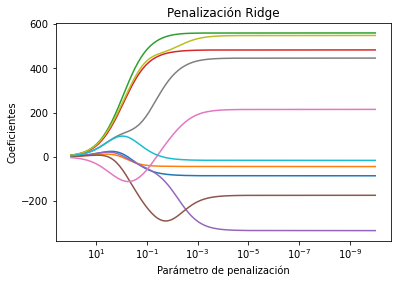

In [ ]:
coefs = []
for a in alphasCalibrar:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(XTrain, yTrain)
    coefs.append(ridge.coef_)

# Presentación de resultados

ax = plt.gca()

ax.plot(alphasCalibrar, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('Parámetro de penalización')
plt.ylabel('Coeficientes')
plt.title('Penalización Ridge')
plt.axis('tight')
plt.show()

Finalmente, podemos hacer predicciones sobre la muestra de evaluación y calcular el MSE correspondiente con el comando que se muestra enseguida:

In [ ]:
prediccionRidge=modeloRidge.predict(XTest)
MSERidge=np.average(np.square(prediccionRidge-yTest))
print('MSE regresión con penalización tipo Ridge:')
print(MSERidge)

MSE regresión con penalización tipo Ridge:
3116.347005800314


### Modelo con penalización tipo LASSO

Este modelo utiliza la norma del vector de betas como la suma del valor absoluto de sus componentes, es decir, el problema de optimización que se busca solucionar es:

$$\hat\beta = argmin \sum_{i=1}^{n} (Y_i-\beta^tX_i)^2 + \lambda \sum_{j=1}^{k} |\beta_j|$$

A continuación se muestra el código para calibrar el modelo con penalización LASSO usando cross-validation:

In [ ]:
n_alphas = 200
alphasCalibrar = np.logspace(-10, 2, n_alphas)
modeloLASSO = LassoCV(alphas=alphasCalibrar).fit(XTrain, yTrain)

Una vez calibrado el modelo, podemos saber el valor de $\lambda$, del $R^{2}$ de la regresión y de los coeficientes estimados utilizando los siguientes comandos:

In [ ]:
print('El parámetro de penalización es:')
print(modeloLASSO.alpha_)
print('El valor del R^2 es:')
print(modeloLASSO.score(XTrain, yTrain))
print('Los coeficientes estimados son:')
print(modeloLASSO.coef_)

El parámetro de penalización es:
0.04824108704165374
El valor del R^2 es:
0.5560271023727925
Los coeficientes estimados son:
[  -7.84287066 -151.6588139   590.8063923   251.03733442 -158.75797546
   -0.         -193.40634314    0.          596.76793272   14.73853109]


Para observar lo que sucede con los coeficientes a medida que cambia el valor del parámetro de penalización, se debe correr el siguiente código:

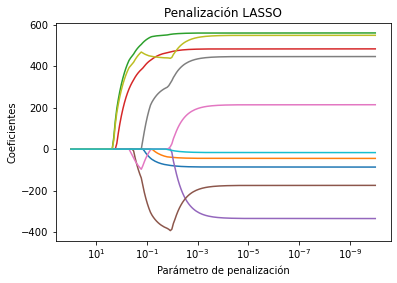

In [ ]:
coefs = []
for a in alphasCalibrar:
    lasso = Lasso(alpha=a, fit_intercept=False,max_iter=10000)
    lasso.fit(XTrain, yTrain)
    coefs.append(lasso.coef_)

# Presentación de resultados

ax = plt.gca()

ax.plot(alphasCalibrar, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('Parámetro de penalización')
plt.ylabel('Coeficientes')
plt.title('Penalización LASSO')
plt.axis('tight')
plt.show()

Finalmente, podemos hacer predicciones sobre la muestra de evaluación y calcular el MSE correspondiente con el comando que se muestra enseguida:

In [ ]:
prediccionLASSO=modeloLASSO.predict(XTest)
MSELASSO=np.average(np.square(prediccionLASSO-yTest))
print('MSE regresión con penalización tipo LASSO:')
print(MSELASSO)

MSE regresión con penalización tipo LASSO:
3158.1726904665447


### Modelo con penalización tipo Elastic Net

Este modelo combina la norma euclidiana clásica del vector de betas junto con la norma del vector de betas como la suma del valor absoluto de sus componentes, es decir, es una combinación entre la penalización tipo Ridge y la penalización tipo LASSO.
De esta manera, el problema de optimización que se busca solucionar es:

$$\hat\beta = argmin \sum_{i=1}^{n} (Y_{i}-\beta^tX_i)^2 + \lambda((1-\alpha) \sum_{j=1}^{k} \beta_j^{2}+ \alpha \sum_{j=1}^{k} |\beta_j|)$$

Como se puede observar, para este tipo de penalización hay dos parámetros de calibración $\lambda$ y $\alpha$. Además, es importante notar que si tenemos $\alpha=0$ estaríamos hablando de un modelo con penalización tipo Ridge, y si tenemos $\alpha=1$ estaríamos hablando de un modelo con penalización tipo LASSO.

A continuación se muestra el código para calibrar el modelo con penalización Elastic Net usando cross-validation:

In [ ]:
n_alphas = 200
alphasCalibrar = np.logspace(-10, 2, n_alphas)
modeloElastic = ElasticNetCV(alphas=alphasCalibrar,cv=5, random_state=0).fit(XTrain,yTrain)

Una vez calibrado el modelo, podemos saber el valor de $\lambda$, del $R^{2}$ de la regresión y de los coeficientes estimados utilizando los siguientes comandos:

In [ ]:
print('El parámetro de penalización es:')
print(modeloElastic.alpha_)
print('El valor del R^2 es:')
print(modeloElastic.score(XTrain, yTrain))
print('Los coeficientes estimados son:')
print(modeloElastic.coef_)

El parámetro de penalización es:
0.0004937047852839004
El valor del R^2 es:
0.5538625583085408
Los coeficientes estimados son:
[ -26.9569002  -167.54484824  546.83904689  268.2522041   -74.76095447
  -92.30768544 -209.00556072   62.2106805   504.47407276   58.48911283]


Para observar lo que sucede con los coeficientes a medida que cambia el valor del parámetro de penalización, se debe correr el siguiente código:

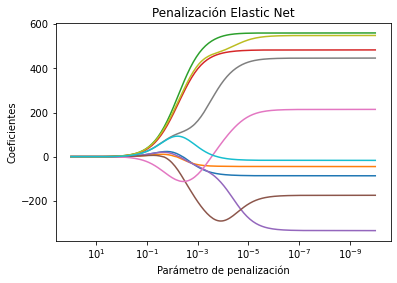

In [ ]:
coefs = []
for a in alphasCalibrar:
    elasticNet = ElasticNet(alpha=a, fit_intercept=False,max_iter=10000)
    elasticNet.fit(XTrain, yTrain)
    coefs.append(elasticNet.coef_)

# Presentación de resultados

ax = plt.gca()

ax.plot(alphasCalibrar, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('Parámetro de penalización')
plt.ylabel('Coeficientes')
plt.title('Penalización Elastic Net')
plt.axis('tight')
plt.show()

Finalmente, podemos hacer predicciones sobre la muestra de evaluación y calcular el MSE correspondiente con el comando que se muestra enseguida:

In [ ]:
prediccionElastic=modeloElastic.predict(XTest)
MSEElastic=np.average(np.square(prediccionElastic-yTest))
print('MSE regresión con penalización tipo Elastic Net:')
print(MSEElastic)

MSE regresión con penalización tipo Elastic Net:
3098.8249623929796


### Comparación de modelos

Finalmente, se presenta un código que grafica conjuntamente los MSE en test de los tres modelos.

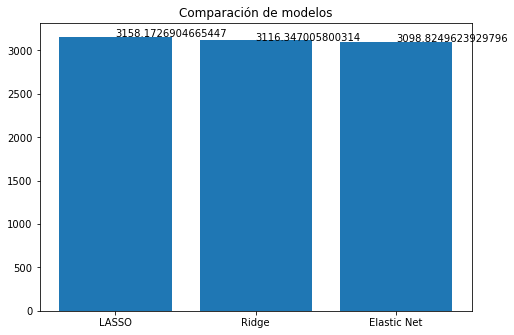

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['LASSO', 'Ridge','Elastic Net']
ejeY = [MSELASSO,MSERidge,MSEElastic]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Como se puede observar, para este caso particular, el desempeño del modelo Elastic Net fue mejor que el de Ridge y LASSO.

### Implementación de código

A continuación deberá escribir una función que reciba como parámetros la matriz de predictores de entrenamiento, la variable de respuesta de entrenamiento, la matriz de predictores de evaluación, la variable de respuesta de evaluación y un parámetro llamado "penalización" que sea 1 si se quiere estimar un modelo con penalización tipo LASSO, 2 si se quiere estimar un modelo con penalización tipo Ridge y 3 si se quiere estimar un modelo con penalización tipo Elastic Net. Luego, se deberá estimar el modelo solicitado con los datos de entrenamiento y calcular las predicciones para el conjunto de evaluación. Finalmente, se debera retornar el MSE del modelo en test.

In [ ]:
def funcion(XTrain,yTrain,XTest,yTest,penalizacion):
    ### Escriba aquí el procedimiento solicitado

    # rango de alphas a probar igual para todos los modelos
    n_alphas = 200
    alphasCalibrar = np.logspace(-10, 2, n_alphas)

    if penalizacion == 1:
        #Lasso
        # crear el objeto
        # el default es 5 pliegues (cv = 5)
        modelo = LassoCV(alphas=alphasCalibrar)
        # ajustar el modelo
        modelo.fit(XTrain,yTrain)

    elif penalizacion == 2:
        # Ridge
        # crear el objeto
        # el default es 5 pliegues (cv = 5)
        modelo = RidgeCV(alphas=alphasCalibrar)
        # ajustar el modelo
        modelo.fit(XTrain, yTrain)

    elif penalizacion == 3:
        # Elastic Net
        # crear el objeto
        # random_state para hacerlo reproducible
        # el default es 5 pliegues (cv = 5)
        modelo = ElasticNetCV(alphas=alphasCalibrar, random_state=0)
        # ajustar el modelo
        modelo.fit(XTrain,yTrain)


    # predecir con el modelo creado
    prediccion=modelo.predict(XTest)
    # evaluarlo
    MSE=np.average(np.square(prediccion-yTest))
    return MSE

In [ ]:
MSE_selec = funcion(XTrain,yTrain,XTest,yTest,2)
print(MSE_selec)

3116.327874769497
